In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium.plugins import HeatMap

%matplotlib inline

In [2]:
df = pd.read_csv('metadata.csv')
df

,Recording_ID,Genus,Specific_epithet,Subspecies,English_name,Recordist,Country,Locality,Latitude,Longitude,...,Other_species23,Other_species24,Other_species25,Other_species26,Other_species27,Other_species28,Other_species29,Other_species30,Species,Path
0,356824,Sonus,naturalis,NaN,Soundscape,José Carlos Sires,Spain,"doñana visitable, sevilla, andalucía",37.1058,-6.2577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-356824.mp3
1,317951,Sonus,naturalis,NaN,Soundscape,José Carlos Sires,Spain,"arroyo algarbe, hinojos, huelva, andalucía",37.3006,-6.3783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-317951.mp3
2,508571,Sonus,naturalis,NaN,Soundscape,Nelson Conceição,Portugal,"Santo Estêvão, Tavira, Faro",37.1554,-7.6960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-508571.mp3
3,448534,Sonus,naturalis,NaN,Soundscape,José Carlos Sires,Spain,"Córdoba, Córdoba, Andalucía",37.9321,-4.9446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-448534.mp3
4,373414,Sonus,naturalis,NaN,Soundscape,Lars Lachmann,Germany,"Frohnau, Berlin, north-eastern part",52.6408,13.2956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-373414.mp3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,518681,Glaucidium,passerinum,NaN,Eurasian Pygmy Owl,Daniele Baroni,Finland,"Nousis, Åbo, Southwest Finland",60.6657,22.2822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glaucidium passerinum,mp3//Glaucidium-passerinum-518681.mp3
2146,401901,Glaucidium,passerinum,passerinum,Eurasian Pygmy Owl,Jarek Matusiak,Russian Federation,"Gmina Dubeninki, Nesterovsky District, Kalinin...",54.3490,22.6561,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glaucidium passerinum,mp3//Glaucidium-passerinum-401901.mp3
2147,201176,Glaucidium,passerinum,passerinum,Eurasian Pygmy Owl,Bram Piot,France,"Haut-Jura, Farges, Ain",46.1716,5.8689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glaucidium passerinum,mp3//Glaucidium-passerinum-201176.mp3
2148,408254,Glaucidium,passerinum,NaN,Eurasian Pygmy Owl,Miklos Heincz,Hungary,"Velem, Kőszegi, Vas County",47.3411,16.4901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glaucidium passerinum,mp3//Glaucidium-passerinum-408254.mp3


In [3]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Drop column: 'Path'
    df = df.drop(columns=['Path'])
    # Drop column: 'Other_species30'
    df = df.drop(columns=['Other_species30'])
    # Drop column: 'Other_species28'
    df = df.drop(columns=['Other_species28'])
    # Drop column: 'Other_species29'
    df = df.drop(columns=['Other_species29'])
    # Drop column: 'Other_species27'
    df = df.drop(columns=['Other_species27'])
    # Drop column: 'Other_species26'
    df = df.drop(columns=['Other_species26'])
    # Drop column: 'Other_species25'
    df = df.drop(columns=['Other_species25'])
    # Drop column: 'Other_species24'
    df = df.drop(columns=['Other_species24'])
    # Drop column: 'Other_species23'
    df = df.drop(columns=['Other_species23'])
    # Drop column: 'Remarks'
    df = df.drop(columns=['Remarks'])
    # Drop column: 'Spectrogram_full'
    df = df.drop(columns=['Spectrogram_full'])
    # Drop column: 'Spectrogram_large'
    df = df.drop(columns=['Spectrogram_large'])
    # Drop column: 'Spectrogram_med'
    df = df.drop(columns=['Spectrogram_med'])
    # Drop column: 'Spectrogram_small'
    df = df.drop(columns=['Spectrogram_small'])
    # Drop column: 'file.name'
    df = df.drop(columns=['file.name'])
    # Convert Date column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # Drop rows with missing data in column: 'Date'
    df = df.dropna(subset=['Date'])
    # Replace all instances of "?" with "" in column: 'Altitude'
    df['Altitude'] = df['Altitude'].replace(to_replace='?', value=np.nan)
    # Replace all instances of "" with "" in column: 'Time'
    df['Time'] = df['Time'].replace(to_replace='?', value=np.nan)
    # Drop column: 'Url'
    df = df.drop(columns=['Url'])
    # Drop column: 'License'
    df = df.drop(columns=['License'])
    # Drop column: 'Audio_file'
    df = df.drop(columns=['Audio_file'])
    # Capitalize the first character in column: 'Locality'
    df['Locality'] = df['Locality'].str.title()
    return df

df_clean = clean_data(df.copy())
df = df_clean
df

,Recording_ID,Genus,Specific_epithet,Subspecies,English_name,Recordist,Country,Locality,Latitude,Longitude,...,Other_species14,Other_species15,Other_species16,Other_species17,Other_species18,Other_species19,Other_species20,Other_species21,Other_species22,Species
0,356824,Sonus,naturalis,NaN,Soundscape,José Carlos Sires,Spain,"Doñana Visitable, Sevilla, Andalucía",37.1058,-6.2577,...,Emberiza schoeniclus,Serinus serinus,Chloris chloris,Carduelis carduelis,Galerida cristata,Melanocorypha calandra,Passer hispaniolensis,Corvus corax,NaN,Sonus naturalis
1,317951,Sonus,naturalis,NaN,Soundscape,José Carlos Sires,Spain,"Arroyo Algarbe, Hinojos, Huelva, Andalucía",37.3006,-6.3783,...,Luscinia megarhynchos,Passer domesticus,Petronia petronia,Turdus merula,NaN,NaN,NaN,NaN,NaN,Sonus naturalis
2,508571,Sonus,naturalis,NaN,Soundscape,Nelson Conceição,Portugal,"Santo Estêvão, Tavira, Faro",37.1554,-7.6960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis
3,448534,Sonus,naturalis,NaN,Soundscape,José Carlos Sires,Spain,"Córdoba, Córdoba, Andalucía",37.9321,-4.9446,...,Dendrocopos major,Aegithalos caudatus,Cyanistes caeruleus,Lophophanes cristatus,Garrulus glandarius,Sylvia melanocephala,NaN,NaN,NaN,Sonus naturalis
4,373414,Sonus,naturalis,NaN,Soundscape,Lars Lachmann,Germany,"Frohnau, Berlin, North-Eastern Part",52.6408,13.2956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,518681,Glaucidium,passerinum,NaN,Eurasian Pygmy Owl,Daniele Baroni,Finland,"Nousis, Åbo, Southwest Finland",60.6657,22.2822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glaucidium passerinum
2146,401901,Glaucidium,passerinum,passerinum,Eurasian Pygmy Owl,Jarek Matusiak,Russian Federation,"Gmina Dubeninki, Nesterovsky District, Kalinin...",54.3490,22.6561,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glaucidium passerinum
2147,201176,Glaucidium,passerinum,passerinum,Eurasian Pygmy Owl,Bram Piot,France,"Haut-Jura, Farges, Ain",46.1716,5.8689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glaucidium passerinum
2148,408254,Glaucidium,passerinum,NaN,Eurasian Pygmy Owl,Miklos Heincz,Hungary,"Velem, Kőszegi, Vas County",47.3411,16.4901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glaucidium passerinum


In [4]:
df.columns.values

# Convert Length from "minutes:seconds" format to total seconds
def convert_to_seconds(length):
    try:
        minutes, seconds = map(int, length.split(':'))
        return minutes * 60 + seconds
    except ValueError:
        return np.nan  # Handle invalid formats as NaN
    
df['Length_seconds'] = df['Length'].apply(convert_to_seconds)

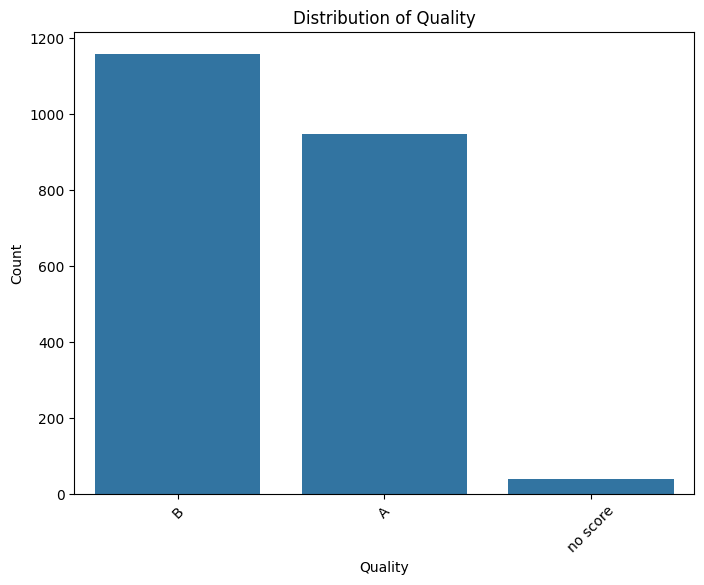

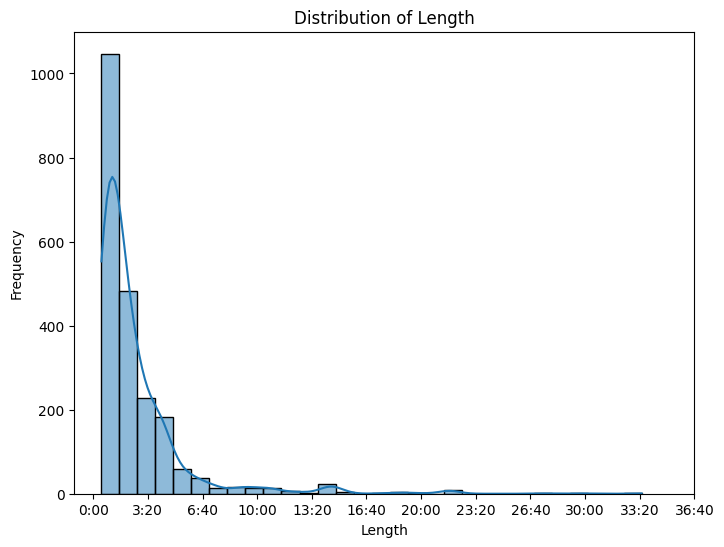

In [5]:
# Distribution of Quality
plt.figure(figsize=(8, 6))
sns.countplot(x='Quality', data=df, order=df['Quality'].value_counts().index)
plt.title('Distribution of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of Length
plt.figure(figsize=(8, 6))
sns.histplot(df['Length_seconds'], bins=30, kde=True)
plt.title('Distribution of Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
max_length = int(df['Length_seconds'].max())
step = max(10, (max_length // 10))  # Ensure at least 10-second intervals
plt.xticks(ticks=range(0, max_length + step, step), labels=[f"{t//60}:{t%60:02d}" for t in range(0, max_length + step, step)])
plt.show()


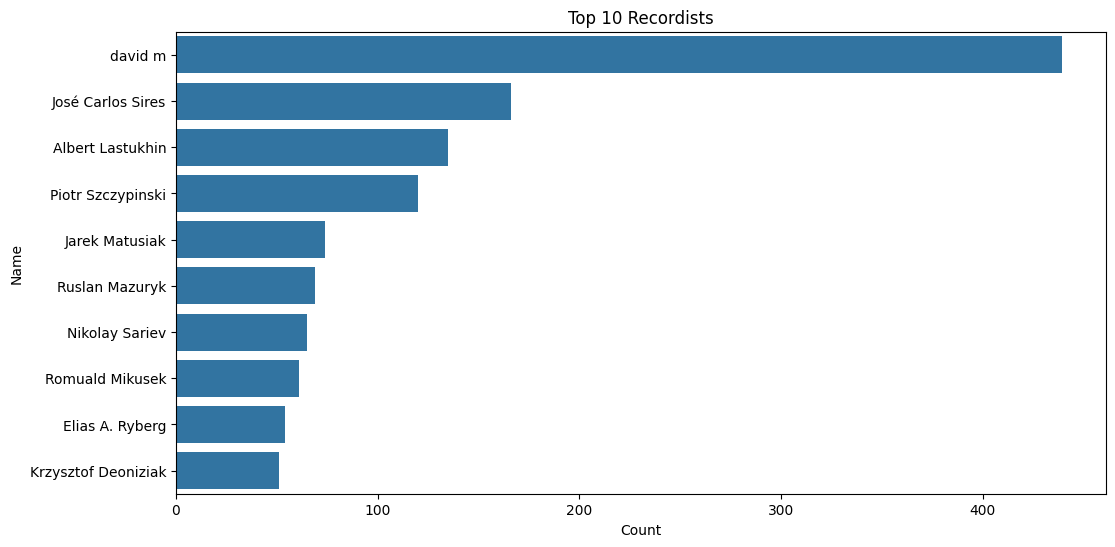

In [20]:
# Top 10 Recordists
plt.figure(figsize=(12, 6))
sns.countplot(y='Recordist', data=df, order=df['Recordist'].value_counts().nlargest(10).index)
plt.title('Top 10 Recordists')
plt.xlabel('Count')
plt.ylabel('Name')
plt.show()

In [6]:
# Geographic distribution of bird calls
fig = px.scatter_geo(df, lat='Latitude', lon='Longitude', 
                     hover_name='English_name', 
                     title='Geographic Distribution of Bird Calls')
fig.update_geos(projection_type="natural earth")
fig.show()

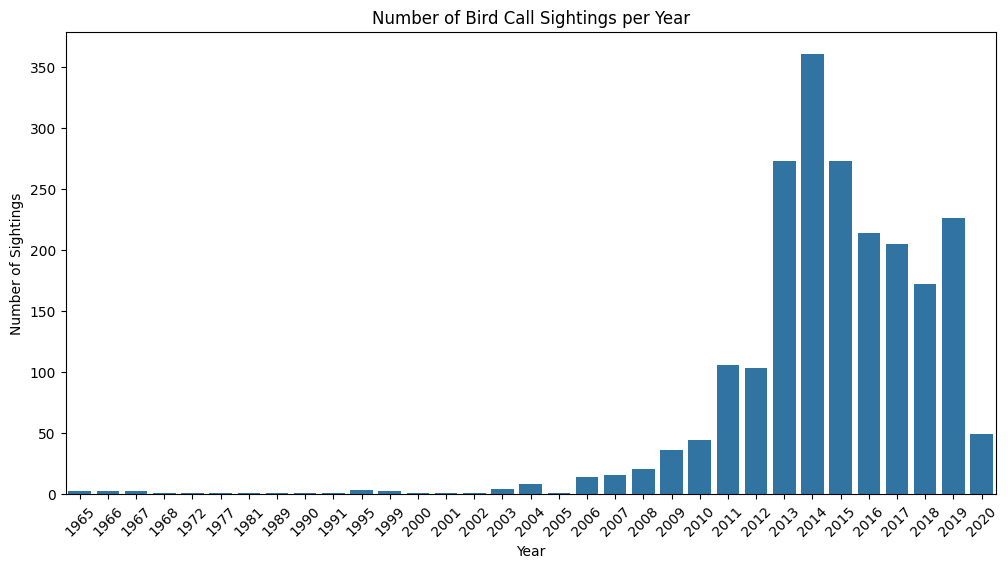

In [7]:
# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(12,6))
sns.countplot(x='Year', data=df)
plt.title('Number of Bird Call Sightings per Year')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Sightings')
plt.show()


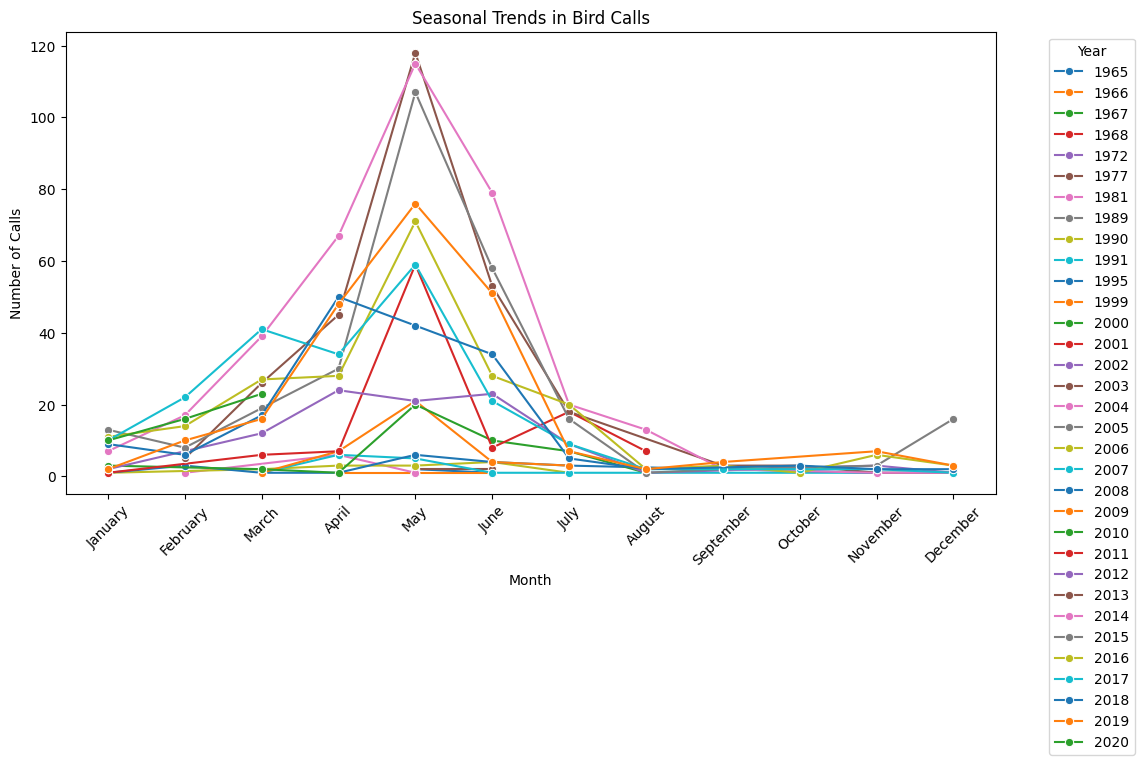

In [8]:
# Seasonal trends in bird calls
seasonal_trend = df.groupby(['Year', 'Month']).size().reset_index(name='Call_Count')
plt.figure(figsize=(12, 6))
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sns.lineplot(x='Month', y='Call_Count', hue='Year', data=seasonal_trend, marker='o', palette='tab10')
plt.title('Seasonal Trends in Bird Calls')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [9]:
# Species Diversity
unique_species = df['Species'].nunique()
unique_subspecies = df['Subspecies'].nunique()
print(f"Number of unique species: {unique_species}")
print(f"Number of unique subspecies: {unique_subspecies}")

Number of unique species: 50
Number of unique subspecies: 66


C:\Users\Grzegorz\AppData\Local\Temp\ipykernel_3548\2058765573.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




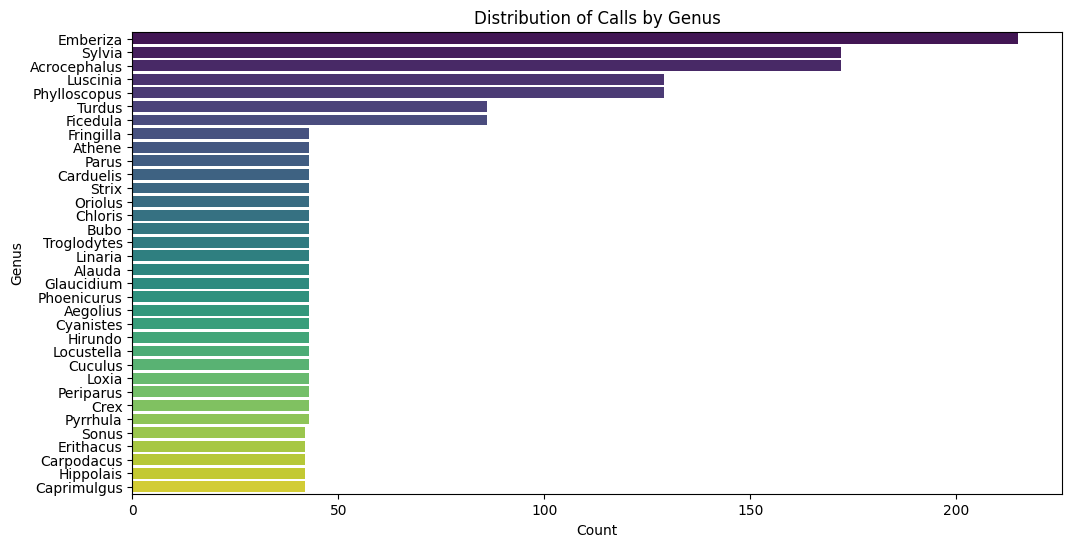

In [28]:
# Distribution of calls by genus
plt.figure(figsize=(12, 6))
sns.countplot(y='Genus', data=df, order=df['Genus'].value_counts().index, palette='viridis')
plt.title('Distribution of Calls by Genus')
plt.xlabel('Count')
plt.ylabel('Genus')
plt.show()

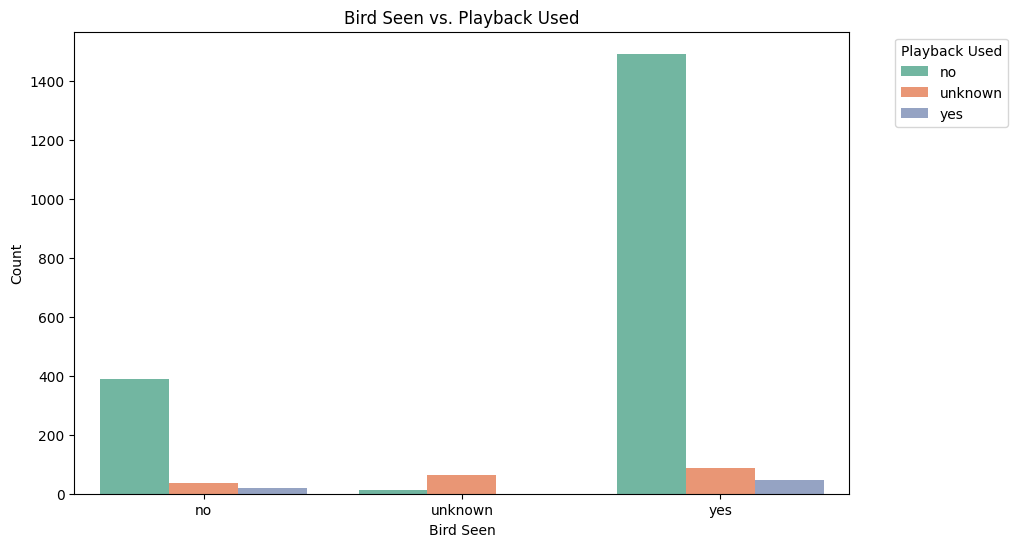

In [11]:
# Bird Behavior Analysis: Bird_seen vs Playback_used
behavior_data = df.groupby(['Bird_seen', 'Playback_used']).size().reset_index(name='Counts')
plt.figure(figsize=(10, 6))
sns.barplot(x='Bird_seen', y='Counts', hue='Playback_used', data=behavior_data, palette='Set2')
plt.title('Bird Seen vs. Playback Used')
plt.xlabel('Bird Seen')
plt.ylabel('Count')
plt.legend(title='Playback Used', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

C:\Users\Grzegorz\AppData\Local\Temp\ipykernel_3548\3742034633.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




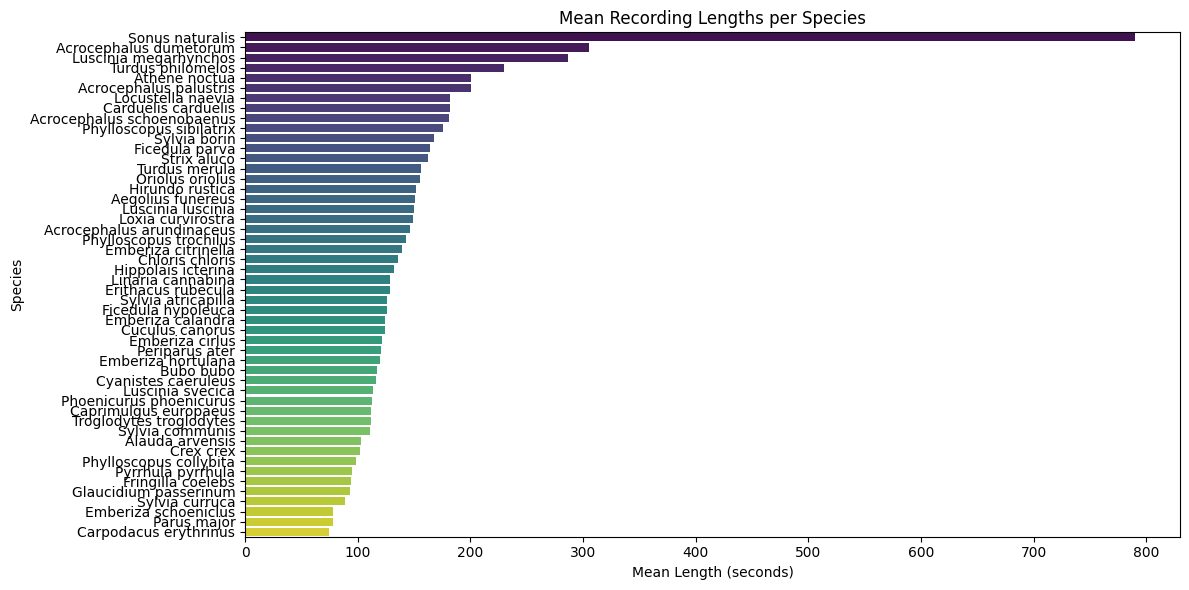

In [21]:
# Calculate mean recording length per species
mean_length_species = df.groupby('Species')['Length_seconds'].mean().reset_index()
mean_length_species = mean_length_species.sort_values(by='Length_seconds', ascending=False)

# Plot mean recording lengths per species
plt.figure(figsize=(12, 6))
sns.barplot(x='Length_seconds', y='Species', data=mean_length_species, palette='viridis')
plt.title('Mean Recording Lengths per Species')
plt.xlabel('Mean Length (seconds)')
plt.ylabel('Species')
plt.tight_layout()
plt.show()

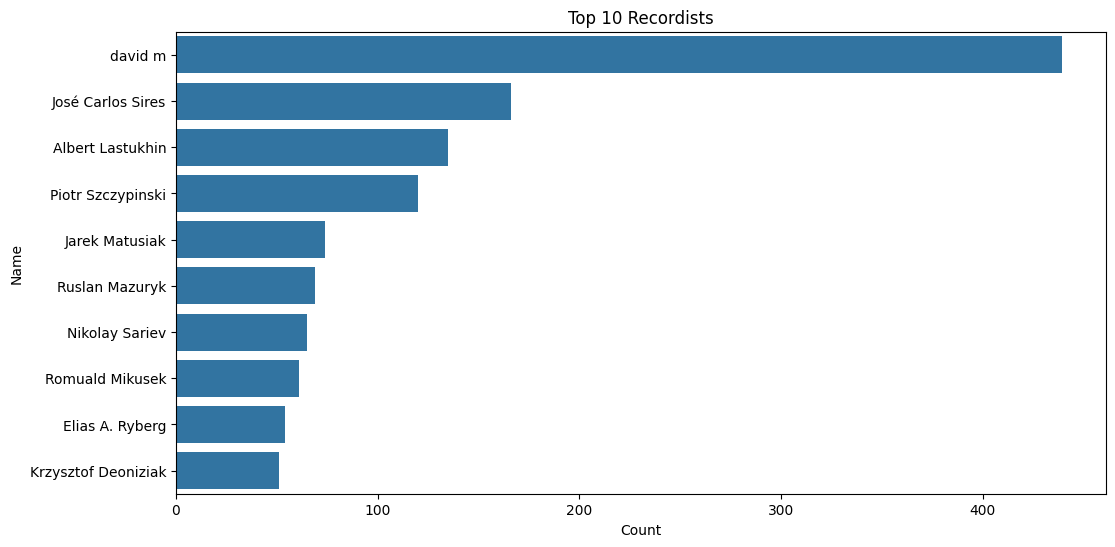

In [14]:
# Heatmap of bird call recordings using Latitude and Longitude
heatmap_data = df[['Latitude', 'Longitude']].dropna()
map_center = [heatmap_data['Latitude'].mean(), heatmap_data['Longitude'].mean()]
heatmap_map = folium.Map(location=map_center, zoom_start=6)
HeatMap(heatmap_data.values.tolist(), radius=8).add_to(heatmap_map)
heatmap_map.save('heatmap.html')  # Save to an HTML file



C:\Users\Grzegorz\AppData\Local\Temp\ipykernel_3548\1015884949.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




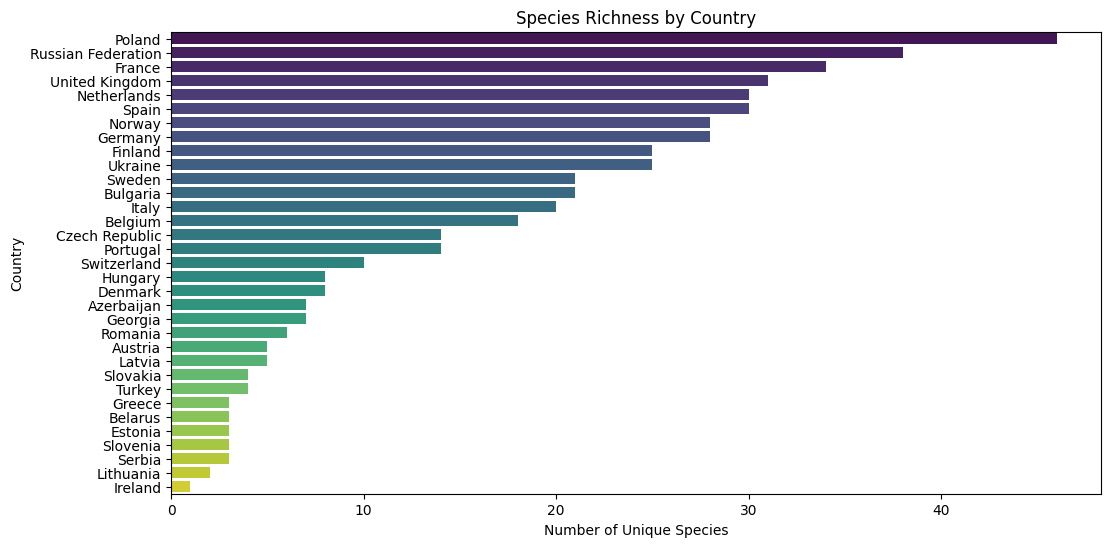

In [16]:
# Species count by country
species_count = df.groupby('Country')['Species'].nunique().reset_index()
species_count = species_count.sort_values(by='Species', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Species', y='Country', data=species_count, palette='viridis')
plt.title('Species Richness by Country')
plt.xlabel('Number of Unique Species')
plt.ylabel('Country')
plt.show()


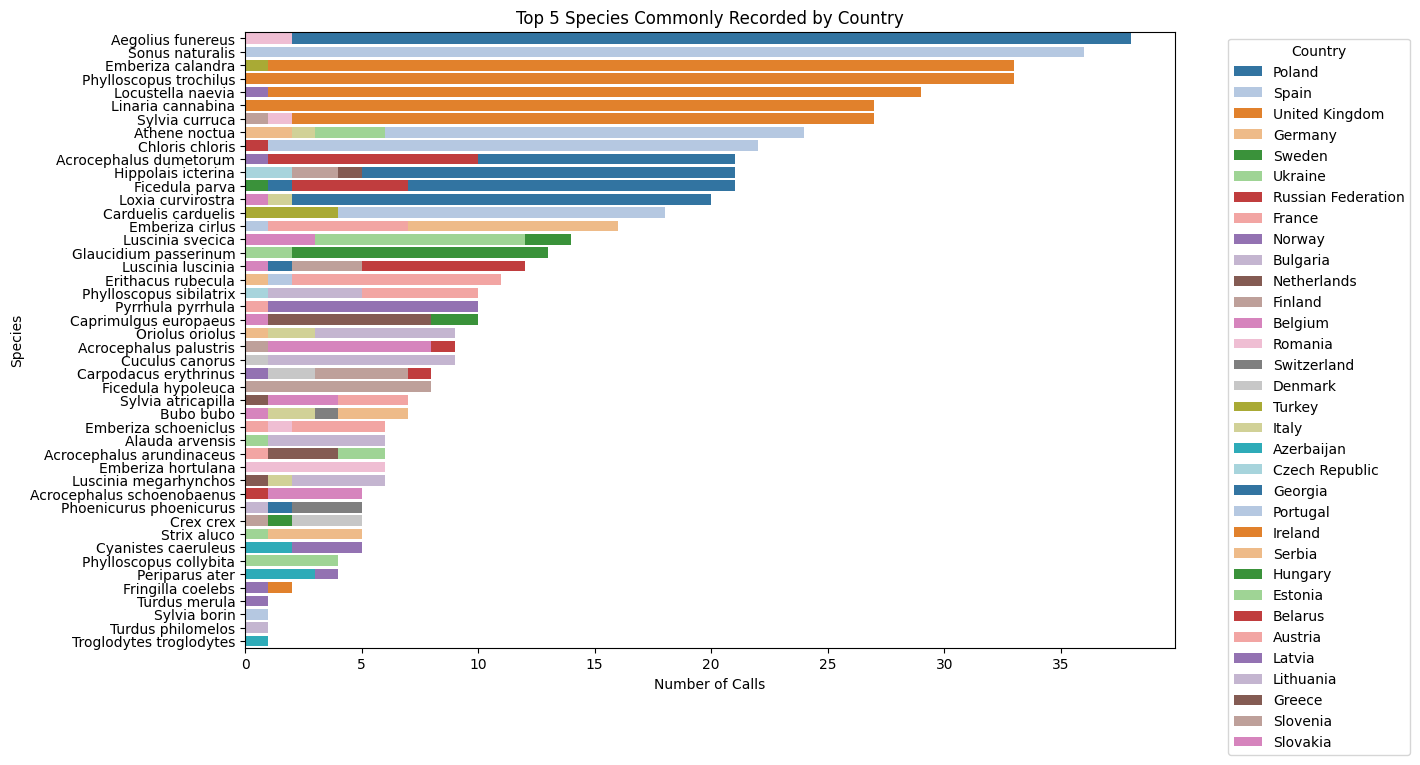

In [17]:
# Species commonly recorded in specific countries
species_country = df.groupby(['Country', 'Species']).size().reset_index(name='Counts')
common_species = species_country.sort_values(by='Counts', ascending=False).groupby('Country').head(5)
plt.figure(figsize=(12, 8))
sns.barplot(x='Counts', y='Species', hue='Country', data=common_species, dodge=False, palette='tab20')
plt.title('Top 5 Species Commonly Recorded by Country')
plt.xlabel('Number of Calls')
plt.ylabel('Species')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()